<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h1>Basic Info </h1>


In [5]:
boston_df.describe(include="all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<h1>Descriptive Statistics and Visualisations </h1>

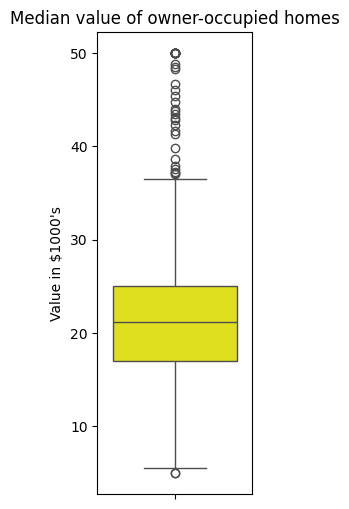

The median value of an owner-occupied home in Boston is: 21.2 thousand dollars
The 25th percentile is: 17.025 thousand dollars
The 75th percentile is: 25.0 thousand dollars
The most expensive owner-occupied home is worth: 50.0 thousand dollars
The least expensive owner-occupied home is worth: 5.0 thousand dollars


In [25]:
pyplot.figure(figsize=(2,6))
sns.boxplot(y='MEDV',data=boston_df, color="yellow")
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("Value in $1000's")
pyplot.show()

Q1 = boston_df["MEDV"].quantile(0.25)
Q3 = boston_df["MEDV"].quantile(0.75)
Max = boston_df["MEDV"].max()
Min = boston_df["MEDV"].min()

print("The median value of an owner-occupied home in Boston is:", boston_df["MEDV"].median(), "thousand dollars")
print("The 25th percentile is:", Q1, "thousand dollars") 
print("The 75th percentile is:", Q3, "thousand dollars") 
print("The most expensive owner-occupied home is worth:",Max,"thousand dollars")
print("The least expensive owner-occupied home is worth:",Min,"thousand dollars")

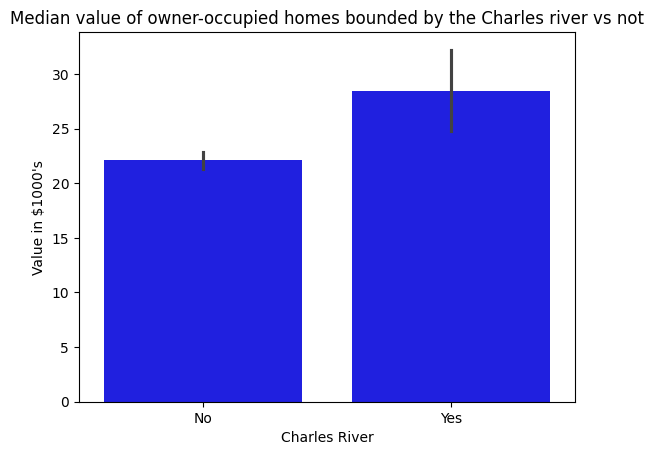

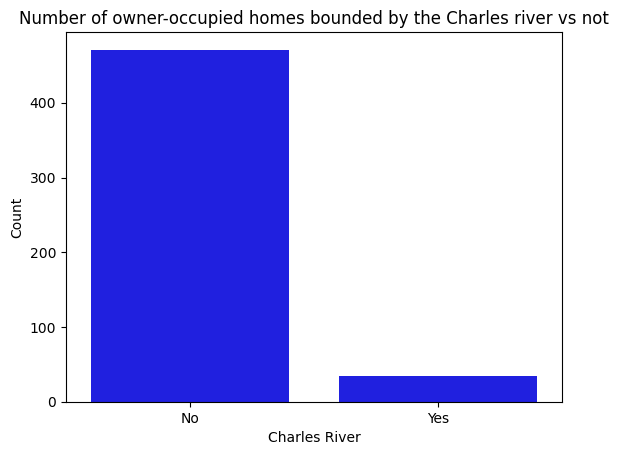

In [42]:
sns.barplot(x="CHAS", y="MEDV",data=boston_df, color="blue")
pyplot.title("Median value of owner-occupied homes bounded by the Charles river vs not")
pyplot.ylabel("Value in $1000's")
pyplot.xlabel("Charles River")
bar_labels = ["No", "Yes"]
pyplot.xticks(ticks=[0, 1], labels=bar_labels)
pyplot.show()

sns.countplot(x='CHAS', data=boston_df, color="blue")
pyplot.title("Number of owner-occupied homes bounded by the Charles river vs not")
pyplot.ylabel("Count")
pyplot.xlabel("Charles River")
bar_labels = ["No", "Yes"]
pyplot.xticks(ticks=[0, 1], labels=bar_labels)
pyplot.show()


In Boston, there are only about 30 houses bounded by the Charles river. Those houses also have a higher median value than houses not bounded by the river.

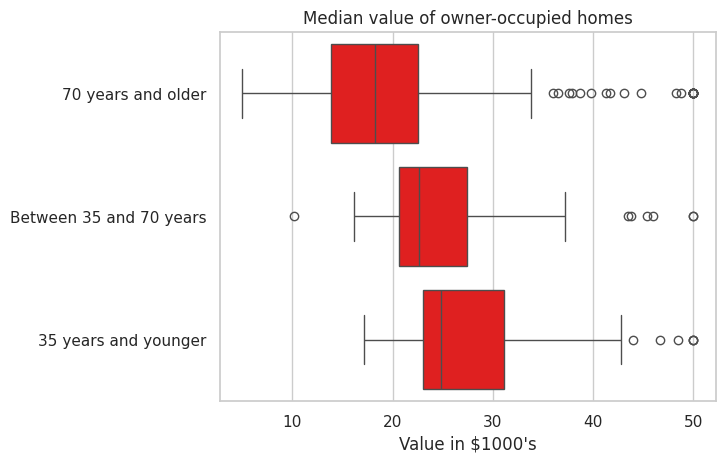

In [59]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
age_group_order = ['70 years and older', 'Between 35 and 70 years','35 years and younger']

sns.boxplot(x='MEDV', y="age_group", data=boston_df, order=age_group_order, color="red")
pyplot.title("Median value of owner-occupied homes")
pyplot.xlabel("Value in $1000's")
pyplot.ylabel("")
pyplot.show()

Older homes have a lower median value relative to younger homes, this can be due to a number of factors, such as low energy efficiency ratings, outdated design and features, or market perception and competition. 

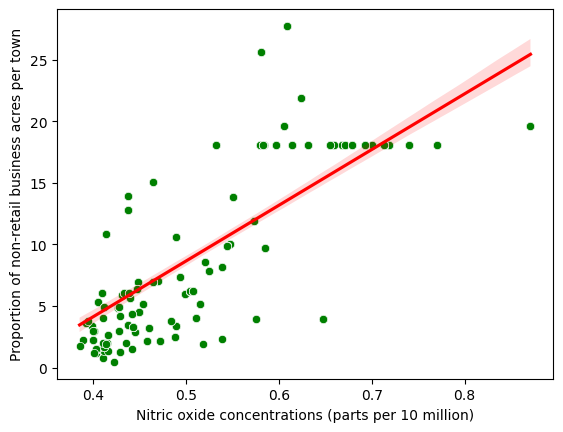

In [19]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df, color="green")
sns.regplot(x="NOX", y="INDUS", data=boston_df, scatter=False, color="red")
pyplot.xlabel("Nitric oxide concentrations (parts per 10 million)")
pyplot.ylabel("Proportion of non-retail business acres per town")
pyplot.show()

The scatter plot shows a positive correlation between the proportion of non-retail business acres per town and nitric oxide concentrations. In other words, the more industrialised a town is, the higher the nitric oxide concentrations.

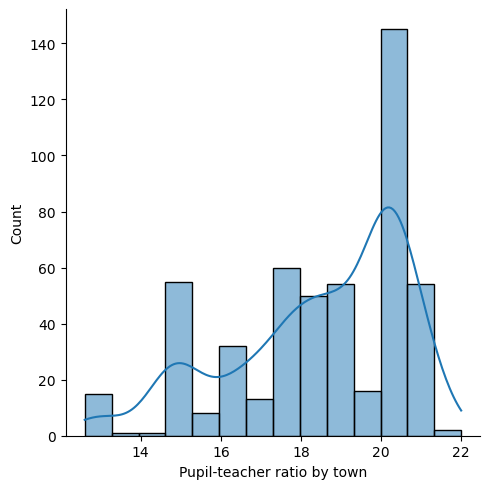

The median number of pupils per teacher is: 19.05


In [40]:
sns.displot(boston_df["PTRATIO"],
                 kde=True,
                 alpha=0.5)
pyplot.xlabel("Pupil-teacher ratio by town")

pyplot.show()
print("The median number of pupils per teacher is:", boston_df["PTRATIO"].median())

The histogram shows a negatively skewed distribution, which means the bulk of the values are concenrated on the right side of the histogram.

<h1>Hypothesis Testing </h1>

<h4>Hypothesis #1: Is there a significant difference in median value of houses bounded by the Charles river or not? </h4>

H₀: μ = μ₀ The median value of houses bounded by the Charles River is statistically the same as the median value of houses not bounded by the Charles River.

H₁: μ ≠ μ₀ There is a statistical difference in the median value of houses bounded by the Charles River compared to houses not bounded by the Charles River.

(Two-tailed t-test for independent samples)


1) Levene's test to assesss the equality of variances

In [6]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == False]['MEDV'],
                   boston_df[boston_df['CHAS'] == True]['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

P-value < 0.05 provides evidence to suggest that the variances are significantly different across the groups.
The equal_var variable will therefore be set to False

2. T-test for independent samples

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == True]["MEDV"],
                      boston_df[boston_df["CHAS"] == False]["MEDV"], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

P-value < 0.05 suggests that there is a significant difference between the median value of houses bounded by the Charles River compared to the median value of houses not bounded by the Charles River. There is enough evidence to reject the null hypothesis.

<h4>Hypothesis #2: Is there a difference in median values of houses for each proportion of owner occupied units built prior to 1940?</h4>
H₀: μ = μ₀ The median values of houses are equal across all proportions of owner-occupied units built prior to 1940.

H₁: μ ≠ μ₀ The median values of houses vary significantly across at least one proportion of owner-occupied units built prior to 1940.

(Analysis of Variance)

In [35]:
young = boston_df[boston_df['AGE'] <= 35]['MEDV']
average = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
old = boston_df[boston_df['AGE'] > 70]['MEDV']

print(f'f_statistic :{f_statistic}, p_value :{p_value}')

f_statistic :36.40764999196599, p_value :1.7105011022702984e-15


The p-value is < 0.05 and so we reject the null hypothesis in favour of the alternative hypothesis.

<h4>Hypothesis #3: Can we conclude that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town? </h4>
H₀: ρ = 0 There is no correlation between nitric oxide concentrations and proportion of non-retail business acres per town.

H₁: ρ ≠ 0 There is a significant correlation between nitric oxide concentrations and proportion of non-retail business acres per town.

(Pearson Correlation)

In [7]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The p-value is again less than 0.05, we can reject the null hypothesis and conclude that there is a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

<h4>Hypothesis #4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? </h4>

H₀: ρ = 0 There is no impact of additional weighted distance on median home values.

H₁: ρ ≠ 0 There is an impact of additional weighted distance on median home values.

(Regression Analysis)

In [8]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        17:43:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P>|t| values of 0.000 suggest that they are extremely small and are displayed as zero due to the formatting. This indicates that both the intercept and the coefficient for DIS are highly statistically significant. It is therefore save to reject the null hypothesis in favour of the alternative hypothesis.